In [1]:
import pandas as pd
import numpy as np

In [7]:
world_bank = pd.read_excel("WorldBank.xlsx").rename({"Country Name": "Country"}, axis = 1)
world_bank["Population (M)"] = (world_bank["GDP (USD)"] / world_bank["GDP per capita (USD)"] / 1_000_000)
world_bank.head()

,Country,Country Code,Region,IncomeGroup,Year,"Birth rate, crude (per 1,000 people)","Death rate, crude (per 1,000 people)",Electric power consumption (kWh per capita),GDP (USD),GDP per capita (USD),Individuals using the Internet (% of population),"Infant mortality rate (per 1,000 live births)",Life expectancy at birth (years),Population density (people per sq. km of land area),Unemployment (% of total labor force) (modeled ILO estimate),Population (M)
0,Afghanistan,AFG,South Asia,Low income,2018,NaN,NaN,NaN,1.936300e+10,520.897,NaN,47.9,NaN,56.9378,1.542,37.172416
1,Afghanistan,AFG,South Asia,Low income,2017,33.211,6.575,NaN,2.019180e+10,556.302,13.50,49.5,64.130,55.5960,1.559,36.296472
2,Afghanistan,AFG,South Asia,Low income,2016,33.981,6.742,NaN,1.936260e+10,547.228,11.20,51.2,63.763,54.1971,1.634,35.383058
3,Afghanistan,AFG,South Asia,Low income,2015,34.809,6.929,NaN,1.990710e+10,578.466,8.26,53.1,63.377,52.7121,1.679,34.413604
4,Afghanistan,AFG,South Asia,Low income,2014,35.706,7.141,NaN,2.048490e+10,613.856,7.00,55.1,62.966,51.1148,1.735,33.370856


In [8]:
world_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12449 entries, 0 to 12448
Data columns (total 16 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   Country                                                       12449 non-null  object 
 1   Country Code                                                  12449 non-null  object 
 2   Region                                                        12449 non-null  object 
 3   IncomeGroup                                                   12449 non-null  object 
 4   Year                                                          12449 non-null  int64  
 5   Birth rate, crude (per 1,000 people)                          11440 non-null  float64
 6   Death rate, crude (per 1,000 people)                          11416 non-null  float64
 7   Electric power consumption (kWh per capita)                   5848 

In [9]:
world_bank.describe()

,Year,"Birth rate, crude (per 1,000 people)","Death rate, crude (per 1,000 people)",Electric power consumption (kWh per capita),GDP (USD),GDP per capita (USD),Individuals using the Internet (% of population),"Infant mortality rate (per 1,000 live births)",Life expectancy at birth (years),Population density (people per sq. km of land area),Unemployment (% of total labor force) (modeled ILO estimate),Population (M)
count,12449.00000,11440.000000,11416.000000,5848.000000,9.578000e+03,9575.000000,5064.000000,9984.000000,11176.000000,11845.000000,5208.000000,9575.000000
mean,1989.00000,28.643276,10.588539,3175.294686,1.700740e+11,8231.812259,23.334471,51.704437,64.044692,318.861370,8.295079,29.956728
std,17.03007,13.131893,5.489382,4467.139298,8.979866e+11,16173.539954,28.319388,46.131039,11.491087,1593.406041,6.290703,115.803824
min,1960.00000,6.900000,1.127000,0.000000,8.824450e+06,34.790600,0.000000,1.400000,18.907000,0.098625,0.140000,0.008913
25%,1974.00000,16.600000,6.863750,390.385750,1.393010e+09,513.145500,0.594949,14.475000,55.917750,19.783400,3.687000,1.051937
50%,1989.00000,27.545500,9.200000,1541.895000,7.275305e+09,1852.810000,8.406225,37.000000,67.276000,64.007500,6.775000,5.390515
75%,2004.00000,40.881250,12.687000,4313.767500,4.857782e+10,7774.565000,41.295950,78.200000,72.692250,144.823000,11.212250,17.075158
max,2018.00000,58.227000,54.444000,54799.200000,2.050000e+13,189171.000000,100.000000,279.400000,85.417100,21389.100000,37.940000,1391.895280


In [14]:
hdi = pd.read_csv("HDI.csv")

wb_hdi_2014 = world_bank.query("Year == 2014").merge(hdi[["iso3", "hdi_2014"]], how = "left", left_on = "Country Code", right_on = "iso3")

wb_hdi_2014.head()

,Country,Country Code,Region,IncomeGroup,Year,"Birth rate, crude (per 1,000 people)","Death rate, crude (per 1,000 people)",Electric power consumption (kWh per capita),GDP (USD),GDP per capita (USD),Individuals using the Internet (% of population),"Infant mortality rate (per 1,000 live births)",Life expectancy at birth (years),Population density (people per sq. km of land area),Unemployment (% of total labor force) (modeled ILO estimate),Population (M),iso3,hdi_2014
0,Afghanistan,AFG,South Asia,Low income,2014,35.706,7.141,NaN,2.048490e+10,613.856,7.0,55.1,62.966,51.1148,1.735,33.370856,AFG,0.479
1,Albania,ALB,Europe & Central Asia,Upper middle income,2014,12.259,7.219,2309.37,1.322820e+10,4578.670,60.1,8.9,77.813,105.4420,17.490,2.889092,ALB,0.792
2,Algeria,DZA,Middle East & North Africa,Upper middle income,2014,25.538,4.709,1362.87,2.140000e+11,5493.060,29.5,21.8,75.878,16.3425,10.207,38.958249,DZA,0.735
3,American Samoa,ASM,East Asia & Pacific,Upper middle income,2014,17.500,4.200,NaN,6.430000e+08,11525.200,NaN,NaN,NaN,278.9550,NaN,0.055791,NaN,NaN
4,Andorra,AND,Europe & Central Asia,High income: nonOECD,2014,NaN,NaN,NaN,3.350740e+09,42300.300,95.9,3.2,NaN,168.5380,NaN,0.079213,AND,0.871


In [15]:
wb_hdi_2014.describe()

,Year,"Birth rate, crude (per 1,000 people)","Death rate, crude (per 1,000 people)",Electric power consumption (kWh per capita),GDP (USD),GDP per capita (USD),Individuals using the Internet (% of population),"Infant mortality rate (per 1,000 live births)",Life expectancy at birth (years),Population density (people per sq. km of land area),Unemployment (% of total labor force) (modeled ILO estimate),Population (M),hdi_2014
count,211.0,204.000000,204.000000,139.000000,2.010000e+02,201.000000,199.000000,190.000000,197.000000,208.000000,186.000000,201.000000,188.000000
mean,2014.0,20.859378,7.693044,4270.600563,3.907779e+11,17779.147856,45.738525,23.844211,71.832723,424.474198,8.077554,35.668407,0.709527
std,0.0,10.280302,2.706626,5981.464101,1.546117e+12,27113.375249,28.934518,21.750467,8.130386,1986.297846,6.019114,136.957226,0.152831
min,2014.0,7.900000,1.127000,39.055800,3.729180e+07,248.845000,0.990000,1.800000,49.891000,0.137154,0.190000,0.010972,0.370000
25%,2014.0,11.975000,5.836250,858.174500,6.047810e+09,2163.160000,17.730000,6.800000,66.370000,36.550050,3.767250,1.174332,0.581250
50%,2014.0,17.799000,7.501500,2588.300000,3.133500e+10,6684.800000,46.160000,15.050000,73.429000,88.684650,6.513000,7.130572,0.732000
75%,2014.0,28.663750,9.219250,5478.100000,2.060000e+11,20258.000000,69.890000,36.775000,77.583000,210.380000,10.809000,23.589826,0.824750
max,2014.0,47.988000,16.433000,53832.500000,1.750000e+13,189171.000000,98.160000,93.000000,83.980500,19478.800000,28.030000,1359.233706,0.952000


In [17]:
gdp_pivot = world_bank.pivot_table(index = "Year", columns = "Region", values = "GDP (USD)", aggfunc = "sum")
gdp_pivot.head()

Region,East Asia & Pacific,Europe & Central Asia,Latin America & Caribbean,Middle East & North Africa,North America,South Asia,Sub-Saharan Africa
Year,,,,,,,
1960,1.464117e+11,2.834935e+11,5.739654e+10,1.410025e+10,5.430845e+11,4.746783e+10,2.648878e+10
1961,1.466530e+11,3.017402e+11,6.076987e+10,1.480286e+10,6.046452e+11,5.062976e+10,2.753489e+10
1962,1.499092e+11,3.299221e+11,9.396297e+10,1.464985e+10,6.479622e+11,5.403093e+10,2.984425e+10
1963,1.672525e+11,3.638093e+11,9.482963e+10,1.646011e+10,6.848096e+11,6.077062e+10,3.419779e+10
1964,1.921179e+11,4.028910e+11,1.056766e+11,1.817288e+10,7.362342e+11,6.960261e+10,3.338035e+10


In [18]:
pop_pivot = world_bank.pivot_table(index = "Year", columns = "Region", values = "Population (M)", aggfunc = "sum")
pop_pivot.head()

Region,East Asia & Pacific,Europe & Central Asia,Latin America & Caribbean,Middle East & North Africa,North America,South Asia,Sub-Saharan Africa
Year,,,,,,,
1960,872.149068,280.746688,186.852628,59.303286,180.615844,572.526561,168.518542
1961,871.192827,283.656647,192.312725,60.945298,201.909874,584.618194,172.577530
1962,881.036241,286.741448,219.093142,62.667579,205.167974,597.165027,177.066655
1963,902.065879,289.789614,225.199250,64.416446,208.372005,610.162283,181.468995
1964,922.572657,292.833206,231.411905,66.231025,211.318874,623.598506,186.049084


In [19]:
wb_hdi_region = wb_hdi_2014.groupby("Region").agg({"hdi_2014":"mean"}).sort_values("hdi_2014", ascending = False)
wb_hdi_region.head()

,hdi_2014
Region,
North America,0.922000
Europe & Central Asia,0.845320
Latin America & Caribbean,0.739697
Middle East & North Africa,0.736619
East Asia & Pacific,0.729963


Text(0, 0.5, 'GDP (Trillions)')

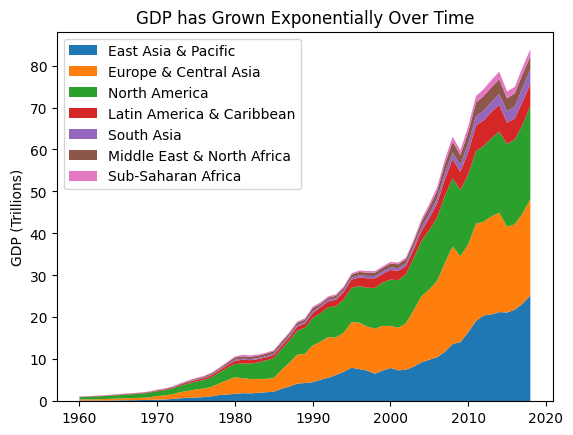

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots()

ax.stackplot(
    gdp_pivot.index,
    [gdp_pivot[region] / 1_000_000_000_000 for region in gdp_pivot.iloc[-1].sort_values(ascending=False).index],
    labels = gdp_pivot.iloc[-1].sort_values(ascending=False).index
)

ax.legend(loc="upper left")
ax.set_title("GDP has Grown Exponentially Over Time")
ax.set_ylabel("GDP (Trillions)")

Text(0, 0.5, 'Population (Billions)')

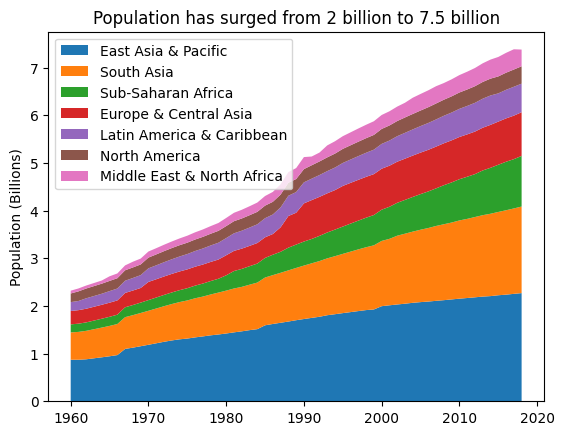

In [37]:
fig, ax = plt.subplots()

ax.stackplot(
    pop_pivot.index,
    [pop_pivot[region] / 1000 for region in pop_pivot.iloc[-1].sort_values(ascending=False).index],
    labels = pop_pivot.iloc[-1].sort_values(ascending=False).index
)

ax.legend(loc="upper left")
ax.set_title("Population has surged from 2 billion to 7.5 billion")
ax.set_ylabel("Population (Billions)")

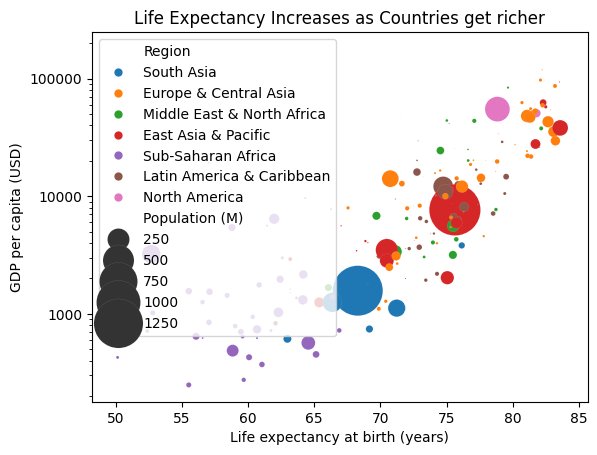

In [39]:
import matplotlib.ticker as mticker

fig, ax = plt.subplots()

minsize = min(wb_hdi_2014["Population (M)"])
maxsize = max(wb_hdi_2014["Population (M)"])

sns.scatterplot(
    data = wb_hdi_2014,
    x = "Life expectancy at birth (years)",
    y = "GDP per capita (USD)",
    size = "Population (M)",
    sizes = (minsize, maxsize),
    hue = "Region",
    ax = ax
).set(title = "Life Expectancy Increases as Countries get richer", yscale = "log")

ax.yaxis.set_major_formatter(mticker.ScalarFormatter())

<Axes: title={'center': 'HDI by Region'}, xlabel='Region', ylabel='Human Development Index (HDI)'>

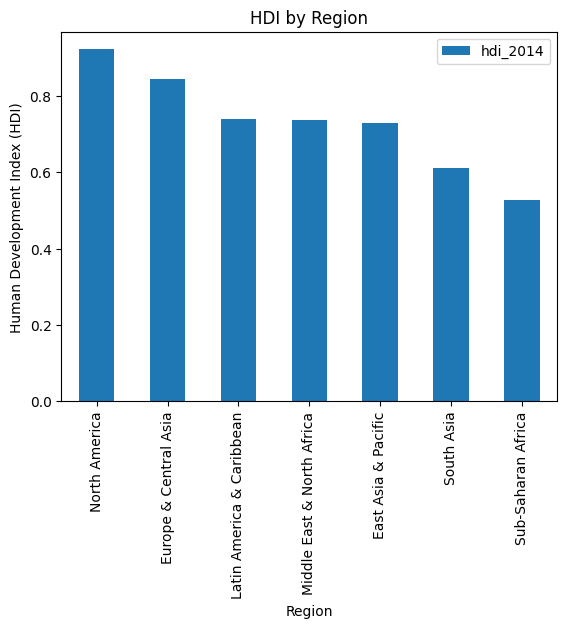

In [55]:
wb_hdi_region.plot.bar(title = "HDI by Region", ylabel = "Human Development Index (HDI)")

[Text(0.5, 1.0, 'Electricity Drives Development')]

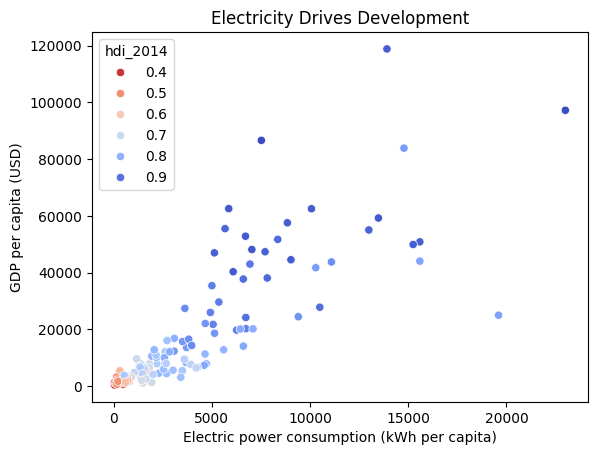

In [41]:
sns.scatterplot(
    data = wb_hdi_2014.query("Country != 'Iceland'"),
    x = "Electric power consumption (kWh per capita)",
    y = "GDP per capita (USD)",
    hue = "hdi_2014",
    palette = "coolwarm_r"
).set(title = "Electricity Drives Development")

<Axes: title={'center': 'HDI by Region'}, xlabel='Region', ylabel='Human Development Index (HDI)'>

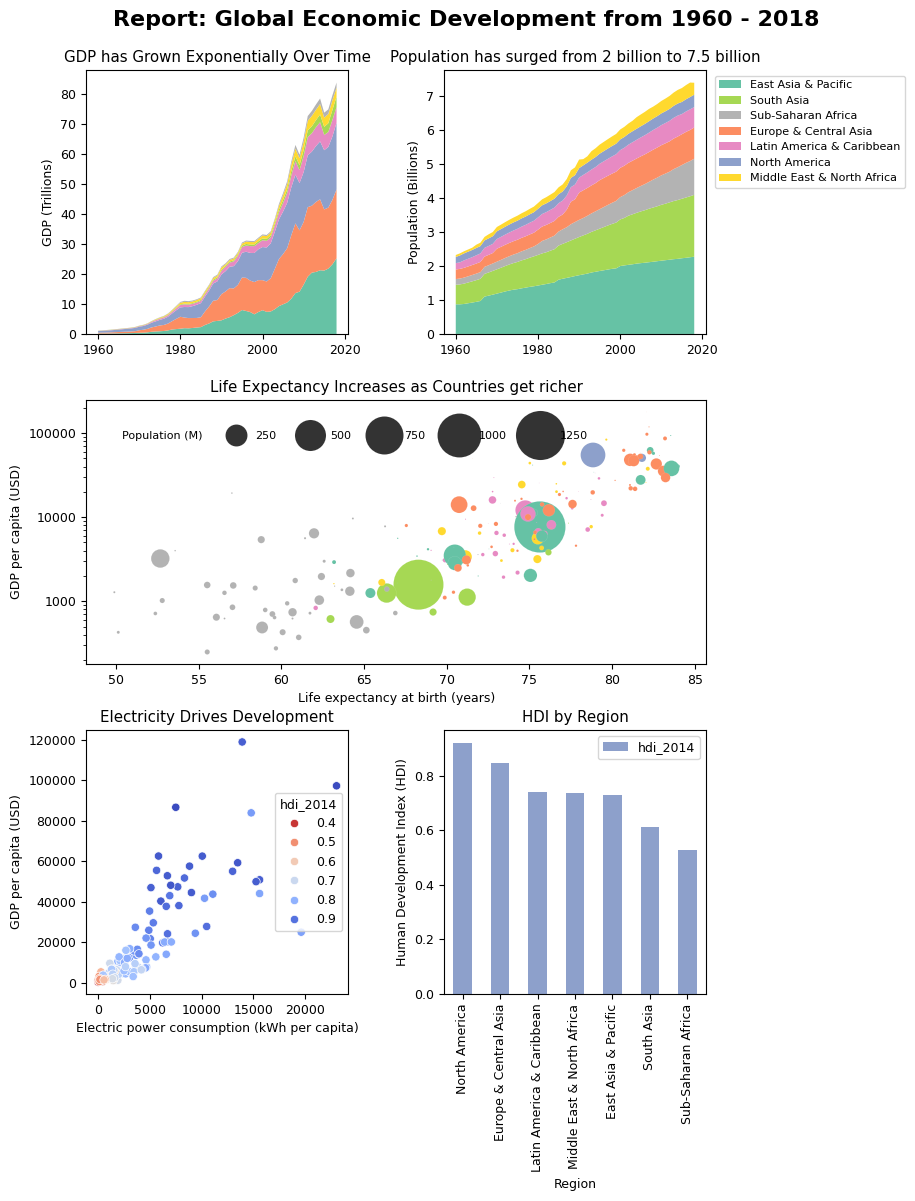

In [105]:
import matplotlib.gridspec as gridspec
import matplotlib as mpl

fig = plt.figure(figsize = (8, 12))

gs = gridspec.GridSpec(nrows = 12, ncols = 6)

mpl.rcParams['font.family'] = "DejaVu Sans"
mpl.rcParams['font.size'] = 9

stack1_list = ['#66C2A5', '#fC8D62', '#8DA0CB', '#E78AC3', '#A6D854', '#FFD92F', '#B3B3B3']
stack2_list = ['#66C2A5', '#A6D854', '#B3B3B3', '#fC8D62', '#E78AC3', '#8DA0CB', '#FFD92F']
bar_list = ['#8DA0CB', '#fC8D62', '#E78AC3', '#FFD92F', '#66C2A5', '#A6D854', '#B3B3B3']
bubble_list = ['#A6D854', '#fC8D62', '#FFD92F', '#66C2A5', '#B3B3B3', '#E78AC3', '#8DA0CB']

fig.suptitle(
    "Report: Global Economic Development from 1960 - 2018",
    fontsize = 16,
    fontweight = "bold",
    x = .60,
    y = .93
)

ax1 = fig.add_subplot(gs[0:4, 0:3])

ax1.stackplot(
    gdp_pivot.index,
    [gdp_pivot[region] / 1_000_000_000_000 for region in gdp_pivot.iloc[-1].sort_values(ascending=False).index],
    labels = gdp_pivot.iloc[-1].sort_values(ascending=False).index,
    colors = stack1_list
)

ax1.set_title("GDP has Grown Exponentially Over Time")
ax1.set_ylabel("GDP (Trillions)")

ax2 = fig.add_subplot(gs[0:4, 3:6])

ax2.stackplot(
    pop_pivot.index,
    [pop_pivot[region] / 1000 for region in pop_pivot.iloc[-1].sort_values(ascending=False).index],
    labels = pop_pivot.iloc[-1].sort_values(ascending=False).index,
    colors = stack2_list
)

ax2.legend(loc="upper left")
ax2.set_title("Population has surged from 2 billion to 7.5 billion")
ax2.set_ylabel("Population (Billions)")
ax2.legend(bbox_to_anchor = (1.78, 1), fontsize = 8)


ax3 = fig.add_subplot(gs[4:8, :])

minsize = min(wb_hdi_2014["Population (M)"])
maxsize = max(wb_hdi_2014["Population (M)"])

sns.scatterplot(
    data = wb_hdi_2014,
    x = "Life expectancy at birth (years)",
    y = "GDP per capita (USD)",
    size = "Population (M)",
    sizes = (minsize, maxsize),
    hue = "Region",
    palette = bubble_list,
    ax = ax3
).set(title = "Life Expectancy Increases as Countries get richer", yscale = "log")

ax3.yaxis.set_major_formatter(mticker.ScalarFormatter())

handles, labels = ax3.get_legend_handles_labels()
entries_to_skip = len(wb_hdi_2014["Region"].unique()) +1

for h in handles[1:]:
  if hasattr(h, "get_sizes"):
    sizes = [s / 1.5 for s in h.get_sizes()]
    h.set_sizes(sizes)

ax3.legend(
    handles[entries_to_skip:],
    labels[entries_to_skip:],
    bbox_to_anchor = (.0, .9),
    loc = 2,
    borderaxespad = 0.,
    frameon = False,
    ncol = 6,
    fontsize = 8
    )


ax4 = fig.add_subplot(gs[8:12, 0:3])

sns.scatterplot(
    data = wb_hdi_2014.query("Country != 'Iceland'"),
    x = "Electric power consumption (kWh per capita)",
    y = "GDP per capita (USD)",
    hue = "hdi_2014",
    palette = "coolwarm_r",
    ax = ax4
).set(title = "Electricity Drives Development")

fig.subplots_adjust(wspace = 4, hspace = 4)

ax5 = fig.add_subplot(gs[8:12, 3:6])

wb_hdi_region.plot.bar(
    title = "HDI by Region",
    ylabel = "Human Development Index (HDI)",
    color = bar_list[:len(wb_hdi_region)],
    ax = ax5
    )